# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [5]:
# Fetch current BTC price
btc_price = requests.get(btc_url)
# Extract response / Retrieve output for BTC in order to get names of rows
btc_response = btc_price.content
# Convert output to JSON
btc_data = btc_price.json()
# print out the queried json data
print(json.dumps(btc_data, indent=4))
# Fetch prices of BTC in order to compute total value of crypto portfolio
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch prices of ETH in order to compute total value of crypto portfolio
eth_price = requests.get(eth_url)
eth_response = eth_price.content
eth_data = eth_price.json()
print(json.dumps(eth_data, indent=4))
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18718225,
            "total_supply": 18718225,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 38005.0,
                    "volume_24h": 65675868553,
                    "market_cap": 711394800451,
                    "percentage_change_1h": 0.83748554807521,
                    "percentage_change_24h": 1.39573449558274,
                    "percentage_change_7d": -13.1915351167152,
                    "percent_change_1h": 0.83748554807521,
                    "percent_change_24h": 1.39573449558274,
                    "percent_change_7d": -13.1915351167152
                }
            },
            "last_updated": 1621953464
        }
    },
    "metadata": {
        "timestamp": 1621953464,
        "num_cryptoc

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [15]:
# Format current date as ISO format
today = pd.Timestamp("2021-05-25", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Drop the time component of the date
df_portfolio.index = df_portfolio.index.date

# Preview DataFrame
df_portfolio.head()

AGG                                      SPY                  \
              open    high     low    close  volume    open    high     low   
2021-05-25  114.58  114.66  114.56  114.655  901585  420.33  420.71  418.86   

                               
              close    volume  
2021-05-25  419.005  13998583

In [18]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"].item()
spy_close_price = df_portfolio["SPY"]["close"].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.655
Current SPY closing price: $419.005


In [19]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20950.25
The current value of your 200 AGG shares is $22931.00


### Savings Health Analysis

In [20]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]} 
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 

# Display savings DataFrame
display(df_savings)

,amount
crypto,59543.145
shares,43881.250


array([<AxesSubplot:ylabel='amount'>], dtype=object)

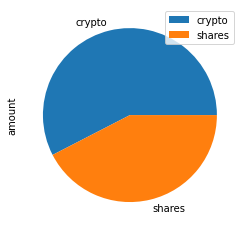

In [22]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True)

In [23]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum().item()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations on having more than 3x your monthly income in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your goal of 3x your monthly income in your emergency fund.")
else:
    print(f'You are ${emergency_fund - total_savings} away from reaching your goal of 3x your monthly income in your emergency fund.')

Congratulations on having more than 3x your monthly income in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [30]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-05-24', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-24', tz='America/New_York').isoformat()

In [31]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000,
).df

# Display sample data
df_stock_data

AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2017-06-02 00:00:00-04:00  109.74  109.89  109.7047  109.840  1322101.0   
2017-06-05 00:00:00-04:00  109.66  109.74  109.6000  109.660  2074161.0   
2017-06-06 00:00:00-04:00  109.87  109.95  109.8100  109.870  1434088.0   
2017-06-07 00:00:00-04:00  109.81  109.87  109.7000  109.730  1570692.0   
2017-06-08 00:00:00-04:00  109.70  109.70  109.5101  109.650  1243191.0   
...                           ...     ...       ...      ...        ...   
2021-05-18 00:00:00-04:00  114.11  114.11  114.0300  114.070  3499293.0   
2021-05-19 00:00:00-04:00  114.62  114.62  113.7900  113.920  6576312.0   
2021-05-20 00:00:00-04:00  114.08  114.30  114.0800  114.290  5646506.0   
2021-05-21 00:00:00-04:00  114.36  114.40  114.2300  114.320  3350907.0   
2021-05-24 00:00:00-04:00  114.50  114.51  114.3800  114.455  3756509.0   

                              SPY                                         
                             open     high      low    close      volume  
time                                                                      
2017-06-02 00:00:00-04:00     NaN      NaN      NaN      NaN         NaN  
2017-06-05 00:00:00-04:00  243.98  244.300  243.760  243.965  27596403.0  
2017-06-06 00:00:00-04:00  243.31  243.980  243.120  243.250  36562468.0  
2017-06-07 00:00:00-04:00  243.60  243.920  242.830  243.650  38602639.0  
2017-06-08 00:00:00-04:00  243.77  244.330  243.170  243.760  48051333.0  
...                           ...      ...      ...      ...         ...  
2021-05-18 00:00:00-04:00  415.80  416.060  411.770  411.990  52318555.0  
2021-05-19 00:00:00-04:00  406.92  411.050  405.335  410.900  94165741.0  
2021-05-20 00:00:00-04:00  411.80  416.625  411.670  415.240  69408898.0  
2021-05-21 00:00:00-04:00  416.87  418.200  414.450  414.950  66355670.0  
2021-05-24 00:00:00-04:00  417.34  420.320  417.080  419.120  45510571.0  

[1001 rows x 10 columns]

In [33]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [34]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-06-02 00:00:00-04:00  109.74  109.89  109.7047  109.84  1322101.0   
2017-06-05 00:00:00-04:00  109.66  109.74  109.6000  109.66  2074161.0   
2017-06-06 00:00:00-04:00  109.87  109.95  109.8100  109.87  1434088.0   
2017-06-07 00:00:00-04:00  109.81  109.87  109.7000  109.73  1570692.0   
2017-06-08 00:00:00-04:00  109.70  109.70  109.5101  109.65  1243191.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-06-02 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-06-05 00:00:00-04:00    -0.001639  243.98  244.30  243.76  243.965   
2017-06-06 00:00:00-04:00     0.001915  243.31  243.98  243.12  243.250   
2017-06-07 00:00:00-04:00    -0.001274  243.60  243.92  242.83  243.650   
2017-06-08 00:00:00-04:00    -0.000729  243.77  244.33  243.17  243.760   

                                                    
                               volume daily_return  
time                                                
2017-06-02 00:00:00-04:00         NaN          NaN  
2017-06-05 00:00:00-04:00  27596403.0          NaN  
2017-06-06 00:00:00-04:00  36562468.0    -0.002931  
2017-06-07 00:00:00-04:00  38602639.0     0.001644  
2017-06-08 00:00:00-04:00  48051333.0     0.000451

In [35]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012205,1.002051,1.004801,1.001026,1.003943,0.994384,0.996851,1.001182,1.000513,0.997291,...,0.995540,1.001033,1.008634,1.021757,1.003773,1.013684,1.008567,1.002002,0.992048,1.002600
2,1.011612,1.000587,0.991989,0.997153,0.989824,0.983088,1.007108,1.002125,0.992077,1.006970,...,0.990872,1.016216,1.016216,1.016077,0.999508,1.006790,1.005526,0.996524,0.987534,0.998275
3,1.014654,0.995018,1.000540,0.999219,0.988818,0.985166,1.021728,1.017634,0.982692,1.009768,...,0.995945,1.018371,1.025445,1.007276,1.005642,1.022778,1.006954,0.999502,0.991532,0.983016
4,1.010762,1.002412,1.004603,0.993165,0.977813,0.990929,1.014534,1.036404,0.973593,1.008342,...,0.987965,1.018300,1.019332,0.994506,0.999132,1.025497,1.008908,1.008149,0.998490,0.984865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,36.960697,14.587333,11.433242,16.264498,9.649536,20.833220,19.036908,34.574124,20.860114,33.170379,...,8.899993,13.733523,37.219310,15.438306,9.445427,21.081946,47.707994,23.145106,22.804452,21.878124
7557,36.849394,14.481555,11.484822,16.166964,9.684771,21.060999,19.052272,34.681974,20.824314,33.409748,...,8.868096,13.678926,37.399880,15.476844,9.253440,21.147080,47.814485,23.025810,23.090488,22.095177
7558,37.081791,14.468699,11.542517,16.269833,9.762436,21.197630,19.028951,34.722796,20.834592,33.899629,...,9.009221,13.628915,37.792678,15.366846,9.209066,21.154814,47.523318,22.723476,23.108686,22.309540
7559,37.112930,14.580608,11.509173,16.456221,9.794919,21.268526,19.129405,34.368386,20.589045,34.110474,...,9.142849,13.659653,38.146685,15.373980,9.249301,21.052678,47.654058,22.510365,23.178975,22.442543


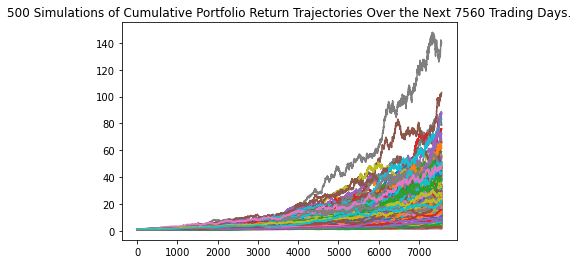

In [36]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

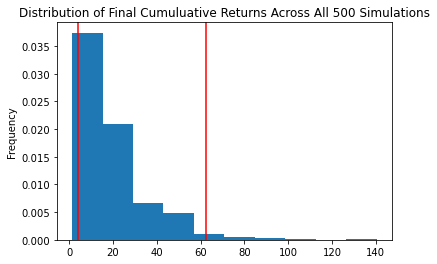

In [37]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             19.892876
std              16.302609
min               1.372149
25%               9.558342
50%              14.760295
75%              24.786891
max             140.351762
95% CI Lower      3.840455
95% CI Upper     62.427874
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [39]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $76809.09 and $1248557.48


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [40]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $115213.64 and $1872836.22


### Five Years Retirement Option

In [41]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-06-02 00:00:00-04:00  109.74  109.89  109.7047  109.84  1322101.0   
2017-06-05 00:00:00-04:00  109.66  109.74  109.6000  109.66  2074161.0   
2017-06-06 00:00:00-04:00  109.87  109.95  109.8100  109.87  1434088.0   
2017-06-07 00:00:00-04:00  109.81  109.87  109.7000  109.73  1570692.0   
2017-06-08 00:00:00-04:00  109.70  109.70  109.5101  109.65  1243191.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-06-02 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-06-05 00:00:00-04:00    -0.001639  243.98  244.30  243.76  243.965   
2017-06-06 00:00:00-04:00     0.001915  243.31  243.98  243.12  243.250   
2017-06-07 00:00:00-04:00    -0.001274  243.60  243.92  242.83  243.650   
2017-06-08 00:00:00-04:00    -0.000729  243.77  244.33  243.17  243.760   

                                                    
                               volume daily_return  
time                                                
2017-06-02 00:00:00-04:00         NaN          NaN  
2017-06-05 00:00:00-04:00  27596403.0          NaN  
2017-06-06 00:00:00-04:00  36562468.0    -0.002931  
2017-06-07 00:00:00-04:00  38602639.0     0.001644  
2017-06-08 00:00:00-04:00  48051333.0     0.000451

In [43]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999373,1.009318,0.987029,0.999598,0.989425,1.005676,1.010150,1.007426,0.984485,1.004940,...,1.000501,0.991923,0.997053,1.003582,0.986214,1.011162,0.983116,1.003485,0.999451,0.996858
2,0.999455,1.023606,0.980232,1.001274,0.999094,0.997780,1.005834,1.013961,0.989327,1.017934,...,0.996892,0.981669,0.990844,1.009770,0.990572,1.030502,0.970502,0.994952,1.005162,1.011582
3,0.996442,1.024116,0.978838,0.987810,1.001416,1.000624,1.012527,1.024446,0.987559,1.018256,...,0.989641,0.977405,0.975816,1.015979,1.004268,1.029559,0.972747,1.001494,1.007522,1.000702
4,0.989284,1.017838,0.977548,0.982437,1.009500,1.011743,1.007124,1.014968,0.990854,1.024404,...,0.980997,0.981890,0.977618,1.022314,1.008271,1.031047,0.968714,1.004117,1.006193,0.990928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.123595,1.352260,1.480283,1.987031,2.105910,0.944411,1.898779,1.024332,3.210177,1.763330,...,1.922102,2.240965,2.109417,1.173083,1.807926,1.583387,2.000044,2.149028,1.636888,3.298179
1257,2.156508,1.366409,1.496553,2.010460,2.143557,0.943240,1.901017,1.019375,3.244113,1.755396,...,1.942180,2.248021,2.143157,1.202596,1.794066,1.575395,1.997464,2.131105,1.651530,3.319606
1258,2.168615,1.367563,1.503429,2.009243,2.121626,0.937632,1.886918,1.017892,3.232125,1.746824,...,1.915454,2.229008,2.143306,1.197990,1.801635,1.562364,2.003213,2.137843,1.656997,3.280558
1259,2.173720,1.371957,1.518013,2.018153,2.136574,0.932642,1.869126,1.002654,3.218992,1.745045,...,1.948809,2.243959,2.088251,1.203250,1.816409,1.564015,2.019469,2.144795,1.666424,3.314114


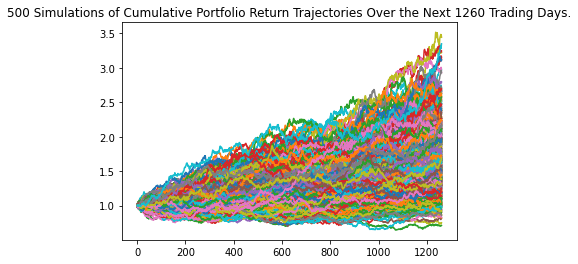

In [44]:
# Plot simulation outcomes
line_plot_five = MC_even_dist_five.plot_simulation()

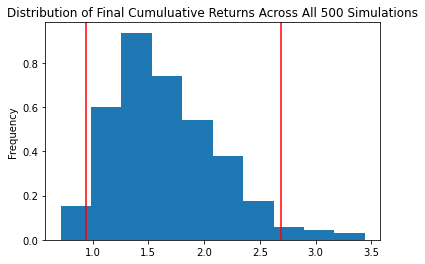

In [45]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_even_dist_five.plot_distribution()

In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_five)

count           500.000000
mean              1.651063
std               0.481379
min               0.711989
25%               1.314313
50%               1.571068
75%               1.958236
max               3.442576
95% CI Lower      0.937169
95% CI Upper      2.688343
Name: 1260, dtype: float64


In [47]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $56230.15 and $161300.6


### Ten Years Retirement Option

In [48]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-06-02 00:00:00-04:00  109.74  109.89  109.7047  109.84  1322101.0   
2017-06-05 00:00:00-04:00  109.66  109.74  109.6000  109.66  2074161.0   
2017-06-06 00:00:00-04:00  109.87  109.95  109.8100  109.87  1434088.0   
2017-06-07 00:00:00-04:00  109.81  109.87  109.7000  109.73  1570692.0   
2017-06-08 00:00:00-04:00  109.70  109.70  109.5101  109.65  1243191.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-06-02 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-06-05 00:00:00-04:00    -0.001639  243.98  244.30  243.76  243.965   
2017-06-06 00:00:00-04:00     0.001915  243.31  243.98  243.12  243.250   
2017-06-07 00:00:00-04:00    -0.001274  243.60  243.92  242.83  243.650   
2017-06-08 00:00:00-04:00    -0.000729  243.77  244.33  243.17  243.760   

                                                    
                               volume daily_return  
time                                                
2017-06-02 00:00:00-04:00         NaN          NaN  
2017-06-05 00:00:00-04:00  27596403.0          NaN  
2017-06-06 00:00:00-04:00  36562468.0    -0.002931  
2017-06-07 00:00:00-04:00  38602639.0     0.001644  
2017-06-08 00:00:00-04:00  48051333.0     0.000451

In [49]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011864,0.992980,0.996994,1.008650,1.004186,1.011452,1.005095,0.988469,0.997736,1.005238,...,0.991875,1.015905,1.005011,0.996862,0.994550,0.987059,1.004108,0.996926,1.006368,1.003178
2,1.001636,0.998449,0.989784,1.003885,1.010828,1.028573,1.009968,0.971500,0.990939,0.992256,...,0.993963,1.013991,1.003003,0.983275,0.999486,0.990969,1.008276,1.001725,1.012867,1.021215
3,0.989556,1.003914,0.993266,1.016683,1.015826,1.036409,1.009315,0.973321,0.988719,0.985886,...,1.002495,1.026055,1.011825,0.979563,0.991291,0.981339,1.015468,1.009429,1.023943,1.036252
4,1.010152,1.004253,0.990580,1.010003,1.016462,1.024100,1.005125,0.987929,0.977420,0.986080,...,1.002391,1.010730,1.010052,0.968792,1.005808,0.977386,1.010455,1.003511,1.024677,1.028535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.058380,1.889040,5.564949,1.663784,1.659931,5.777838,1.029758,2.339847,1.574263,1.552910,...,4.022069,2.471961,2.476929,3.480827,2.514554,1.748716,2.242536,3.537387,6.328686,1.852350
2517,2.033976,1.873428,5.618016,1.653180,1.653750,5.767290,1.025867,2.340480,1.584404,1.542074,...,4.013543,2.495799,2.493464,3.463754,2.509038,1.769176,2.250841,3.565991,6.339306,1.840047
2518,2.053541,1.876376,5.685537,1.655502,1.640579,5.806797,1.021437,2.330538,1.593893,1.553085,...,3.982686,2.528352,2.477836,3.461024,2.490499,1.756978,2.224036,3.595703,6.372267,1.815926
2519,2.062734,1.863373,5.760918,1.696274,1.643078,5.806852,1.031512,2.345589,1.579929,1.556207,...,4.017755,2.520376,2.475072,3.465322,2.491755,1.763157,2.226962,3.646899,6.354224,1.805774


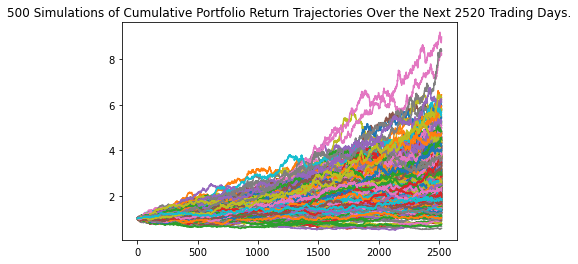

In [50]:
# Plot simulation outcomes
line_plot_ten = MC_even_dist_ten.plot_simulation()

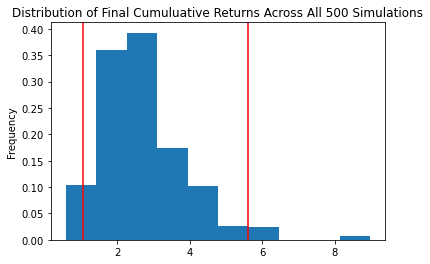

In [51]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [52]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_ten)

count           500.000000
mean              2.697946
std               1.165277
min               0.573042
25%               1.871697
50%               2.483092
75%               3.275727
max               8.974888
95% CI Lower      1.047410
95% CI Upper      5.615243
Name: 2520, dtype: float64


In [53]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $62844.59 and $336914.56
